# Opdracht 1 – Voorspellen van Herseninfarct
## Vak: Machine Learning 
**Teamnaam:** ITCH-bv  
**Teamleden:**  
-  Haben Sebhatu
- Chris de Nooijer
- Tom Spoler
- Ids Grunstra 

**Datum:** 9 september 2025


In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [256]:
df = pd.read_csv('train.csv')

In [365]:
display(df.head())
print(df.info())


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_smokes,stroke
0,30.0,0,0,63.60,33.3,False,False,False,False,False,False,False,False,False,True,0
1,75.0,1,0,215.17,48.0,True,False,True,False,False,True,False,False,False,False,0
2,15.0,0,0,135.22,19.0,False,False,False,False,False,False,False,False,False,False,0
3,47.0,0,0,64.89,28.2,False,False,True,False,False,True,False,True,False,False,0
4,49.0,0,0,222.34,28.8,False,False,True,False,False,True,False,False,True,False,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  bool   
 6   gender_Other                    33550 non-null  bool   
 7   ever_married_Yes                33550 non-null  bool   
 8   work_type_Govt_job              33550 non-null  bool   
 9   work_type_Never_worked          33550 non-null  bool   
 10  work_type_Self-employed         33550 non-null  bool   
 11  work_type_children              33550 non-null  bool   
 12  Residence_type_Urban            

 # Beschrijving van de kolommen

In [262]:


data = {
    "Kolomnaam": [
        "id", "age", "hypertension", "heart_disease", "avg_glucose_level", "bmi",
        "gender_Female", "gender_Male", "gender_Other",
        "ever_married_No", "ever_married_Yes",
        "work_type_Govt_job", "work_type_Never_worked", "work_type_Private",
        "work_type_Self-employed", "work_type_children",
        "Residence_type_Rural", "Residence_type_Urban",
        "smoking_status_formerly smoked", "smoking_status_never smoked", "smoking_status_smokes",
        "stroke"
    ],
    "Meetniveau": [
        "Nominaal", "Ratio", "Nominaal", "Nominaal", "Ratio", "Ratio",
        "Nominaal", "Nominaal", "Nominaal",
        "Nominaal", "Nominaal",
        "Nominaal", "Nominaal", "Nominaal",
        "Nominaal", "Nominaal",
        "Nominaal", "Nominaal",
        "Nominaal", "Nominaal", "Nominaal",
        "Nominaal"
    ],
    "Toelichting": [
        "Uniek ID per patiënt, geen voorspellende waarde",
        "Leeftijd in jaren, heeft een natuurlijk nulpunt",
        "Hoge bloeddruk: 0 = nee, 1 = ja",
        "Hartziekte: 0 = nee, 1 = ja",
        "Gemiddeld glucosegehalte in bloed",
        "Body Mass Index, verhouding gewicht/lengte",
        "Dummy: True = vrouw, anders False",
        "Dummy: True = man, anders False",
        "Dummy: True = ander geslacht, anders False",
        "Dummy: True = nooit getrouwd, anders False",
        "Dummy: True = wel getrouwd, anders False",
        "Dummy: True = overheidspersoneel, anders False",
        "Dummy: True = nooit gewerkt, anders False",
        "Dummy: True = werkt in de private sector, anders False",
        "Dummy: True = zelfstandige, anders False",
        "Dummy: True = kind, anders False",
        "Dummy: True = woont landelijk, anders False",
        "Dummy: True = woont stedelijk, anders False",
        "Dummy: True = vroeger gerookt, anders False",
        "Dummy: True = nooit gerookt, anders False",
        "Dummy: True = rookt nu, anders False",
        "Doelvariabele: 0 = geen herseninfarct, 1 = herseninfarct"
    ]
}

meetniveau_df = pd.DataFrame(data)
meetniveau_df


,Kolomnaam,Meetniveau,Toelichting
0,id,Nominaal,"Uniek ID per patiënt, geen voorspellende waarde"
1,age,Ratio,"Leeftijd in jaren, heeft een natuurlijk nulpunt"
2,hypertension,Nominaal,"Hoge bloeddruk: 0 = nee, 1 = ja"
3,heart_disease,Nominaal,"Hartziekte: 0 = nee, 1 = ja"
4,avg_glucose_level,Ratio,Gemiddeld glucosegehalte in bloed
5,bmi,Ratio,"Body Mass Index, verhouding gewicht/lengte"
6,gender_Female,Nominaal,"Dummy: True = vrouw, anders False"
7,gender_Male,Nominaal,"Dummy: True = man, anders False"
8,gender_Other,Nominaal,"Dummy: True = ander geslacht, anders False"
9,ever_married_No,Nominaal,"Dummy: True = nooit getrouwd, anders False"


# Controleer of de data geschikt is voor Machine Learning

### Missende waarden ###

In [264]:

# We hebben de dataset gecontroleerd op missende waarden
print(df.isnull().sum())


id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
stroke                            0
dtype: int64


#### Alle input moet numeriek zijn

In [344]:
if df.select_dtypes(include=["object"]).empty:
    print("Alle kolommen zijn numeriek.")
else:
    print("Niet-numerieke kolommen gevonden:", df.select_dtypes(include=["object"]).columns.tolist())


Alle kolommen zijn numeriek.


We hebben gecontroleerd of alle kolommen numeriek zijn.
De uitkomst is: alle kolommen zijn numeriek, dus de dataset is klaar voor Scikit-learn.

# Relaties onderzoeken

 #### Numerieke variabelen (correlatiematrix)

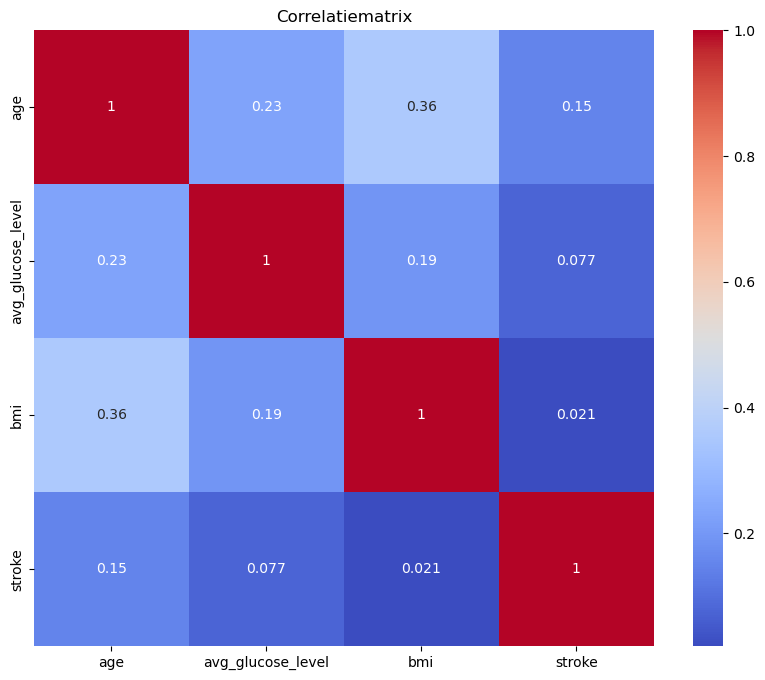

In [280]:

numerieke_kolommen.append("stroke")
numeric_only = df[numerieke_kolommen]
corr_matrix = numeric_only.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlatiematrix')
plt.show()


age – stroke = 0.15  lichte positieve correlatie →ouderen hebben meer kans op stroke.

avg_glucose_level – stroke = 0.077 heel zwakke positieve correlatie → iets hogere glucose hangt een beetje samen met stroke.

bmi – stroke = 0.021  vrijwel geen verband.


#### Binaire variabelen

In [282]:
from scipy.stats import pointbiserialr

binaire_kolommen = [
    "hypertension",
    "heart_disease",
    "gender_Female",
    "gender_Other",
    "ever_married_Yes",
    "work_type_Govt_job",
    "work_type_Never_worked",
    "work_type_Self-employed",
    "work_type_children",
    "Residence_type_Urban",
    "smoking_status_formerly smoked",
    "smoking_status_smokes"
]

biserial_results = {}

for kolom in binaire_kolommen:
    corr, p = pointbiserialr(df[kolom].astype(int), df["stroke"])
    biserial_results[kolom] = {'Punt-biseriële correlatie': corr, 'P-waarde': p}

biserial_df = pd.DataFrame.from_dict(biserial_results, orient='index').reset_index()
biserial_df.columns = ['Variabele', 'Punt-biseriële correlatie', 'P-waarde']

display(biserial_df)


,Variabele,Punt-biseriële correlatie,P-waarde
0,hypertension,0.084019,1.274364e-53
1,heart_disease,0.104625,2.729232e-82
2,gender_Female,-0.008727,1.099282e-01
3,gender_Other,-0.001673,7.592566e-01
4,ever_married_Yes,0.066403,4.179271e-34
5,work_type_Govt_job,-0.004439,4.161961e-01
6,work_type_Never_worked,-0.008127,1.365852e-01
7,work_type_Self-employed,0.061883,7.818600e-30
8,work_type_children,-0.050728,1.441488e-20
9,Residence_type_Urban,0.002654,6.268486e-01


heart_disease (0.105) → sterkste verband van de binaire variabelen, mensen met hartziekte hebben meer kans op stroke.

hypertension (0.084) → ook een duidelijke positieve relatie.

ever_married_Yes (0.066) en self-employed (0.062) → lichte positieve verbanden.

work_type_children (-0.051) → negatieve correlatie  kinderen krijgen bijna geen stroke.

smoking_status_formerly smoked (0.034) → heel klein positief verband.

De rest heeft bijna 0 correlatie → nauwelijks effect.

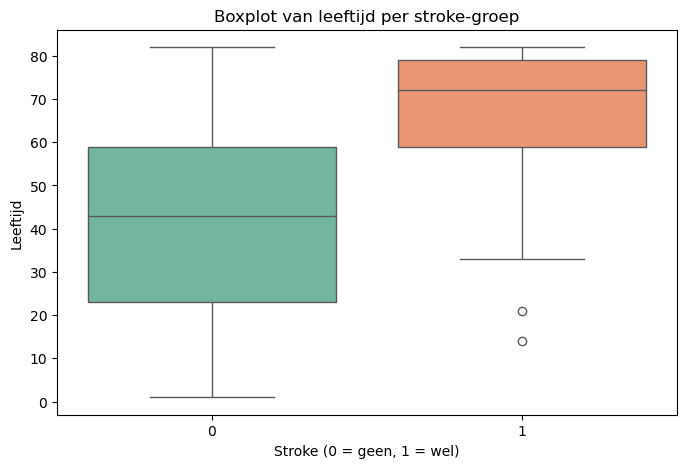

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(
    x="stroke", 
    y="age", 
    hue="stroke", 
    data=df, 
    palette="Set2", 
    legend=False
)


plt.title("Boxplot van leeftijd per stroke-groep")
plt.xlabel("Stroke (0 = geen, 1 = wel)")
plt.ylabel("Leeftijd")
plt.show()


###  boxplot leeftijd per stroke-groep

- Bij 0 (geen stroke) ligt de leeftijd meestal tussen 20 en 60 jaar, met een gemiddelde rond de 40 jaar.  
- Bij  (wel stroke) ligt de leeftijd vooral tussen 60 en 80 jaar, met een gemiddelde rond de 70 jaar.  
- Er zijn enkele uitzonderingen van jonge mensen die ook een stroke hebben gehad.  

 Mensen met een stroke zijn over het algemeen veel ouder dan mensen zonder stroke. Leeftijd is dus een belangrijke factor bij het krijgen van een stroke.


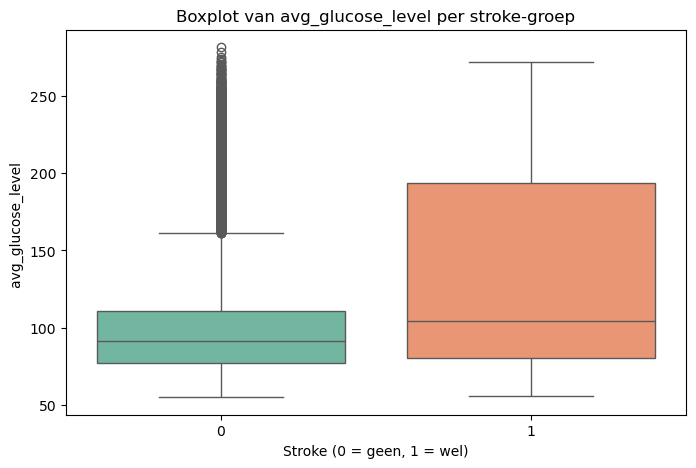

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(
    x="stroke", 
    y="avg_glucose_level", 
    hue="stroke", 
    data=df, 
    palette="Set2", 
    legend=False
)


plt.title("Boxplot van avg_glucose_level per stroke-groep")
plt.xlabel("Stroke (0 = geen, 1 = wel)")
plt.ylabel("avg_glucose_level ")
plt.show()


###  boxplot van avg_glucose_level per stroke-groep

- Bij 0 geen stroke ligt de mediaan van glucose rond de 90, met de meeste waarden tussen 75 en 110.  
- Bij 1 (wel stroke) ligt de mediaan hoger, rond de 105, en de spreiding is duidelijk groter.  
- Er zijn veel outliers met hoge glucosewaarden, vooral bij stroke-patiënten.  

 Mensen met een stroke hebben gemiddeld hogere glucosewaarden dan mensen zonder stroke.  
Glucose lijkt dus een belangrijke factor te zijn bij het voorspellen van stroke.


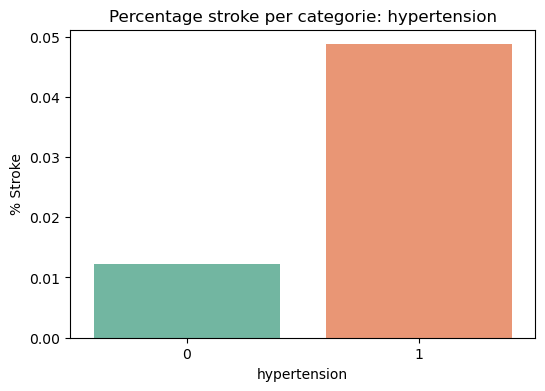

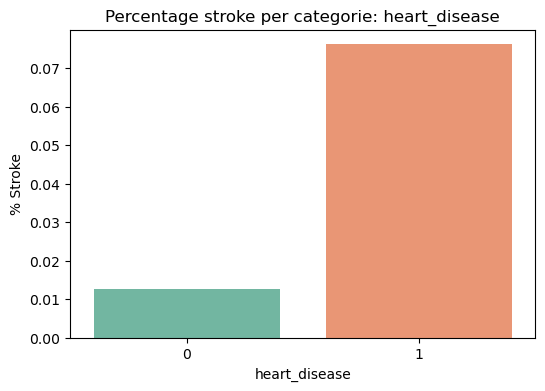

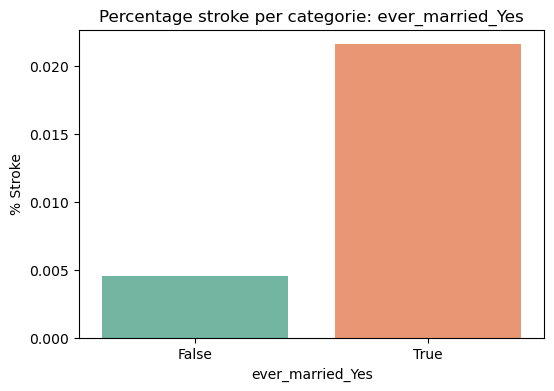

In [314]:
categorische_vars = ["hypertension", "heart_disease", "ever_married_Yes"]

for var in categorische_vars:
    stroke_perc = df.groupby(var)["stroke"].mean().reset_index()
    
    plt.figure(figsize=(6,4))
    sns.barplot(x=var, y="stroke", data=stroke_perc, hue=var, palette="Set2", legend=False)


    plt.title(f"Percentage stroke per categorie: {var}")
    plt.ylabel("% Stroke")
    plt.show()


### Interpretatie barplots: percentage stroke per categorie

1. **Hypertension (hoge bloeddruk)**  
   - Mensen zonder hoge bloeddruk hebben een stroke-percentage van ongeveer **1,2%**.  
   - Mensen mét hoge bloeddruk hebben bijna **5%** kans op een stroke.  
  hoge bloeddruk vergroot de kans op een stroke duidelijk.

2. **Heart disease (hartziekte)**  
   - Zonder hartziekte: ongeveer **1,3%** kans op een stroke.  
   - Met hartziekte: bijna **7,5%** kans.  
   hartziekte is een sterke risicofactor voor een stroke.

3. **Ever married (ooit getrouwd)**  
   - Nooit getrouwd: rond de **0,5%** kans op een stroke.  
   - Wel getrouwd: iets boven de **2%** kans.  
   getrouwde mensen hebben vaker een stroke, waarschijnlijk omdat deze groep gemiddeld ouder is.  

---

**Algemene conclusie:**  
Hoge bloeddruk en hartziekte zijn duidelijke risicofactoren.  
De relatie met getrouwd zijn is minder direct en hangt waarschijnlijk samen met leeftijd.


# Data opschonen

### Multicollineariteit ###

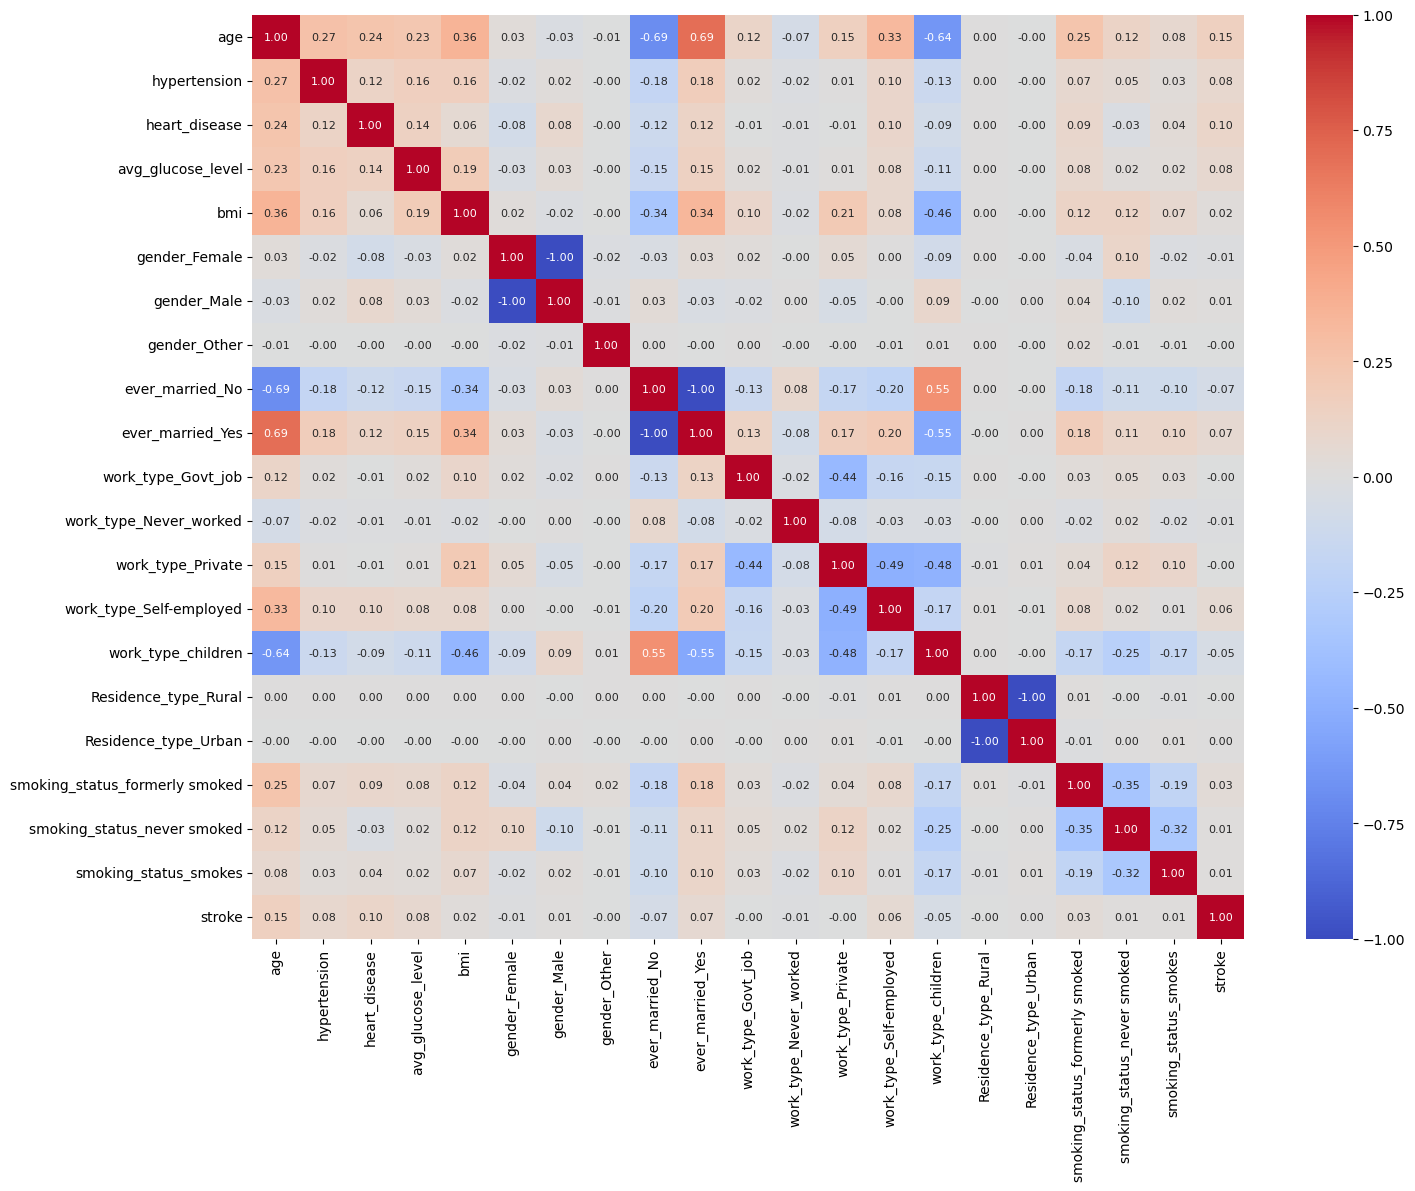

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)  # correlaties tussen numerieke kolommen
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, annot_kws={"size":8})
plt.show()



Er is sprake van multicollineariteit. We hebben dit vastgesteld via de correlatiematrix.


#### ever_married_No en ever_married_Yes. #####

Correlatie ≈ -1 (perfect negatief → als No = 1, dan Yes = 0).

#### gender_Female, gender_Male, gender_Other ####
Samenhang heel sterk: als gender_Female = 1, dan gender_Male = 0 en gender_Other = 0.

#### Residence_type_Rural en Residence_type_Urban ####

Perfect negatief gecorreleerd een van de twee is altijd 1.

#### Work_type dummies #####

work_type_Govt_job, work_type_Never_worked, work_type_Private, work_type_Self-employed, work_type_children

Samen optellend altijd 1. Dus ook hier multicollineariteit.

#### Smoking_status dummies #####

smoking_status_formerly smoked, smoking_status_never smoked, smoking_status_smokes

Ook samen optellend bijna altijd 1 → multicollineariteit.
- - -

Dit is een probleem, omdat deze variabelen bijna dezelfde informatie bevatten. In machine learning of regressie kan dit leiden tot instabiele modellen, verkeerde interpretatie van welke variabele belangrijk is en problemen met het schatten van coëfficiënten.

We kunnen terk samenhangende variabelen verwijderen of combineren, om zo overlapping te vermijden en het model eenvoudiger en betrouwbaarder te maken.

In [328]:
cols_to_drop = [
    "gender_Male", 
    "ever_married_No", 
    "Residence_type_Rural", 
    "work_type_Private", 
    "smoking_status_never smoked"
]

df = df.drop(columns=cols_to_drop, errors="ignore")


#### Verwijderen ID  uit de dataset

In [ ]:

df.drop(columns=["id"], inplace=True)

 Deze bevat alleen een uniek nummer per persoon en heeft geen voorspellende waarde.

#### Numerieke waarden controleren

In [333]:
display(df.describe())

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,41.820346,0.088137,0.043040,103.587081,28.601216,0.015410
std,22.468216,0.283498,0.202951,42.127396,7.782248,0.123178
min,1.000000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000
50%,43.000000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,59.000000,0.000000,0.000000,111.437500,32.800000,0.000000
max,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


In [350]:
# In de kolom 'age' stonden 376 waarden tussen 0.08 en 0.88 (baby's in maanden).
# Dit was verwarrend omdat de rest van de leeftijden in hele jaren staat.
# Daarom hebben we alle waarden kleiner dan 1 jaar veranderd naar 1 jaar,
# zodat de dataset consistenter en beter bruikbaar is voor de modellen.
df.loc[df["age"] < 1, "age"] = 1


# outliers

In [352]:
numerieke_kolommen = [
    "age", "avg_glucose_level", "bmi"
]


extreme_waarden = {}
for kolom in numerieke_kolommen:
    q1 = df[kolom].quantile(0.25)
    q3 = df[kolom].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    extreme_waarden[kolom] = len(outliers)

extreme_waarden_sorted = dict(sorted(extreme_waarden.items(), key=lambda x: x[1], reverse=True))
print(extreme_waarden_sorted)


{'avg_glucose_level': 3641, 'bmi': 769, 'age': 0}


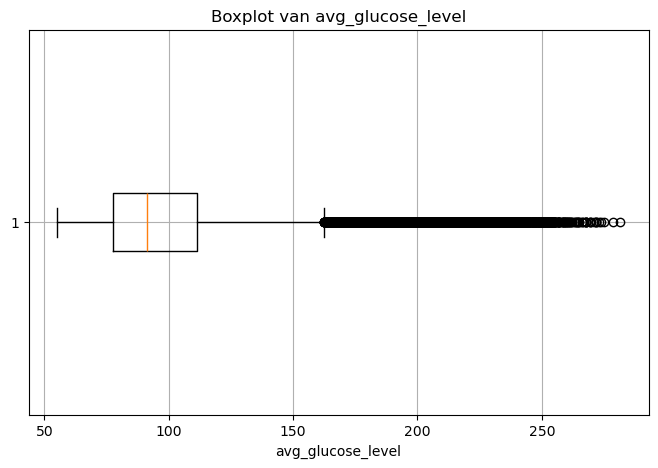

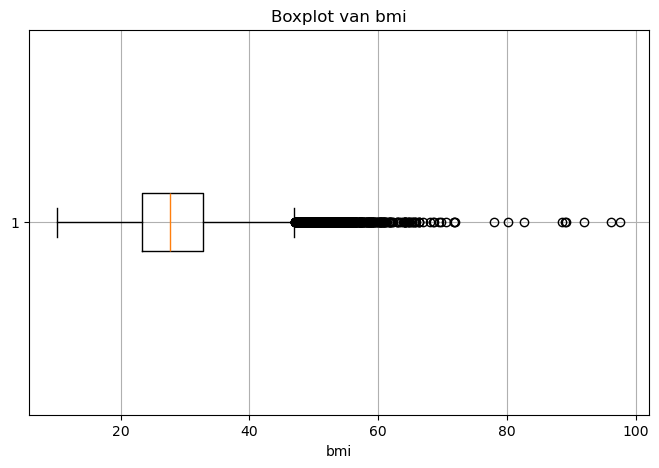

In [354]:
kolommen_met_outliers = [
    'avg_glucose_level', "bmi"
]

#Boxplots tekenen
for kolom in kolommen_met_outliers:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[kolom].dropna(), vert=False)
    plt.title(f'Boxplot van {kolom}')
    plt.xlabel(kolom)
    plt.grid(True)
    plt.show()



In [362]:
for col in ["bmi", "avg_glucose_level"]:
    lower = df[col].quantile(0.01)   # 1e percentiel
    upper = df[col].quantile(0.99)   # 99e percentiel
    df[col] = df[col].clip(lower, upper)


Bij het controleren van de numerieke kolommen (age, avg_glucose_level, bmi) hebben we gekeken of er outliers aanwezig zijn.

Leeftijd  geen opvallende outliers.

Gemiddeld glucose-niveau  ongeveer 3641 outliers gevonden.

BMI ongeveer 769 outliers gevonden.

Dit zagen we ook duidelijk terug in de boxplots: de meeste waarden vallen binnen een normaal bereik, maar er zijn een aantal extreme hoge waarden (vooral bij glucose en BMI).

Oplossing

Om te voorkomen dat deze extreme waarden onze modellen teveel beinvloeden, hebben we gekozen voor clippen :

Waarden die te laag zijn  vervangen door de ondergrens.

Waarden die te hoog zijn vervangen door de bovengrens.

Op die manier blijft de dataset consistenter en worden de modellen robuuster.

 # Standaardiseren van de data

Standaardiseren betekent dat we de waarden van een kolom omzetten zodat ze een gemiddelde van 0 en een spreiding van 1 hebben. 
    
Dit zorgt ervoor dat alle variabelen op dezelfde schaal staan. Dit is vooral nuttig bij modellen die werken met afstanden,

zoals KNN en SVM. Zonder standaardisatie zou bijvoorbeeld avg_glucose_level met waarden tot 280 zwaarder meetellen dan age maximaal 82.

Voor modellen zoals Decision Trees of Random Forests is standaardisatie niet nodig, maar voor afstandsmodellen wel handig.

Daarom hebben we besloten de kolommen age, bmi en avg_glucose_level te standaardiseren.

In [372]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["age", "avg_glucose_level", "bmi"]] = scaler.fit_transform(df[["age", "avg_glucose_level", "bmi"]])


In [374]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_smokes,stroke
0,-0.526100,0,0,-0.955080,0.628893,False,False,False,False,False,False,False,False,False,True,0
1,1.476759,1,0,2.673961,2.577528,True,False,True,False,False,True,False,False,False,False,0
2,-1.193719,0,0,0.759718,-1.266717,False,False,False,False,False,False,False,False,False,False,0
3,0.230536,0,0,-0.924193,-0.047164,False,False,True,False,False,True,False,True,False,False,0
4,0.319552,0,0,2.845632,0.032372,False,False,True,False,False,True,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,-1.460767,0,0,0.151087,-1.796958,False,False,False,False,False,False,True,False,False,False,0
33546,0.230536,0,0,-0.356265,0.297493,True,False,True,False,False,False,False,True,False,False,0
33547,-1.727815,0,0,-0.330646,-1.637886,True,False,False,False,False,False,True,False,False,False,0
33548,0.631108,1,0,-0.503994,-0.100188,True,False,True,True,False,False,False,True,False,True,0
